# Deep Learning Perceptron Task

## Helper functions

In [14]:
IMAGE_PATH = "images"

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

rng = np.random.default_rng(42)

def to_pm1(y01):
    return np.where(y01 == 1, 1, -1)

def accuracy(y_true_pm1, y_pred_pm1):
    return (y_true_pm1 == y_pred_pm1).mean()

def plot_data(X, y01, title="Data", save_name=None):
    plt.figure(figsize=(5,5))
    plt.scatter(X[y01==0,0], X[y01==0,1], s=10, label="Class 0")
    plt.scatter(X[y01==1,0], X[y01==1,1], s=10, label="Class 1")
    plt.legend()
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout()
    plt.savefig(Path(IMAGE_PATH) / f"{save_name}.png")
    plt.show()

def plot_decision_boundary(w, b, X, y01, title="Decision boundary", save_name=None):
    xs = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200)
    if abs(w[1]) > 1e-12:
        ys = -(w[0]/w[1]) * xs - b / w[1]
    else:
        ys = np.full_like(xs, -b/1e-12)

    plt.figure(figsize=(5,5))
    plt.scatter(X[y01==0,0], X[y01==0,1], s=10, label="Class 0")
    plt.scatter(X[y01==1,0], X[y01==1,1], s=10, label="Class 1")
    plt.plot(xs, ys, linewidth=2, label="w·x + b = 0")
    plt.legend()
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout()
    plt.savefig(Path(IMAGE_PATH) / f"{save_name}.png")
    plt.show()

def highlight_misclassified(X, y01, y_pred_pm1, title="Misclassified", save_name=None):
    mis = (to_pm1(y01) != y_pred_pm1)
    plt.figure(figsize=(5,5))
    plt.scatter(X[~mis,0], X[~mis,1], s=10, label="Correct")
    plt.scatter(X[mis,0], X[mis,1], s=30, marker="x", label="Misclassified")
    plt.legend()
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout()
    plt.savefig(Path(IMAGE_PATH) / f"{save_name}.png")
    plt.show()

In [ ]:
class Perceptron:
    """
    Single layer perceptron implementation
    Update rule:
      w <- w + eta * y * x
      b <- b + eta * y
    Runs updates over epochs until no mistakes or max_epochs
    """
    def __init__(self, eta=0.01, max_epochs=100, shuffle=True, seed=None):
        self.eta = float(eta)
        self.max_epochs = int(max_epochs)
        self.shuffle = bool(shuffle)
        self.seed = seed
        self.w = None
        self.b = None
        self.history = {"epoch_acc": []}

    def _sign(self, z):
        # classify >=0 as +1 else -1
        return np.where(z >= 0, 1, -1)

    def fit(self, X, y_pm1):
        n, d = X.shape
        rng_local = np.random.default_rng(self.seed)

        # init small weights
        self.w = rng_local.normal(scale=0.01, size=d)
        self.b = 0.0

        for _ in range(self.max_epochs):
            if self.shuffle:
                idx = rng_local.permutation(n)
            else:
                idx = np.arange(n)

            updates = 0
            for i in idx:
                xi = X[i]
                yi = y_pm1[i]
                pred = self._sign(np.dot(self.w, xi) + self.b)
                if pred != yi:
                    self.w = self.w + self.eta * yi * xi
                    self.b = self.b + self.eta * yi
                    updates += 1

            y_pred = self.predict(X)
            acc = accuracy(y_pm1, y_pred)
            self.history["epoch_acc"].append(acc)

            if updates == 0:
                break

        return self

    def predict(self, X):
        z = X @ self.w + self.b
        return self._sign(z)

## Exercise 1

### Data Generation

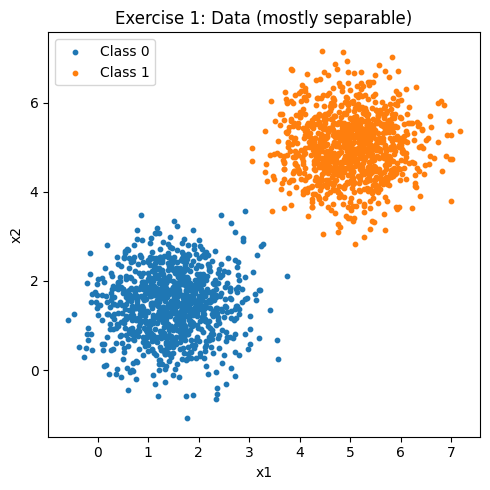

In [17]:
n_per_class = 1000

mean0 = np.array([1.5, 1.5])
cov0  = np.array([[0.5, 0.0], [0.0, 0.5]])

mean1 = np.array([5.0, 5.0])
cov1  = np.array([[0.5, 0.0], [0.0, 0.5]])

X0 = rng.multivariate_normal(mean0, cov0, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov1, size=n_per_class)
X  = np.vstack([X0, X1])
y01 = np.hstack([np.zeros(n_per_class, dtype=int), np.ones(n_per_class, dtype=int)])

plot_data(X, y01, title="Exercise 1: Data (mostly separable)", save_name="exercise1-data")

### Training Perceptron

E1 final weights: [0.01332216 0.01551652]
E1 final bias   : -0.09999999999999999
E1 final accuracy: 1.0000


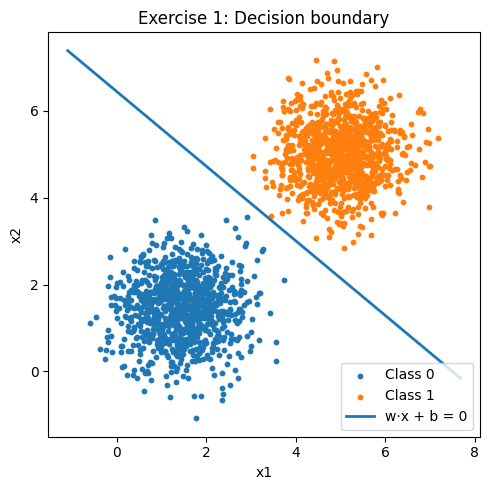

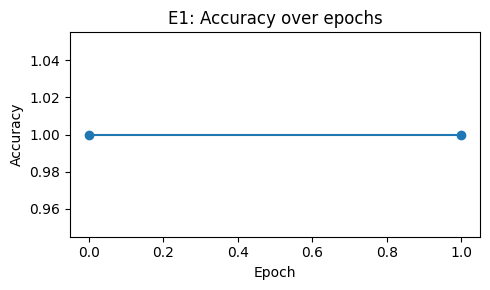

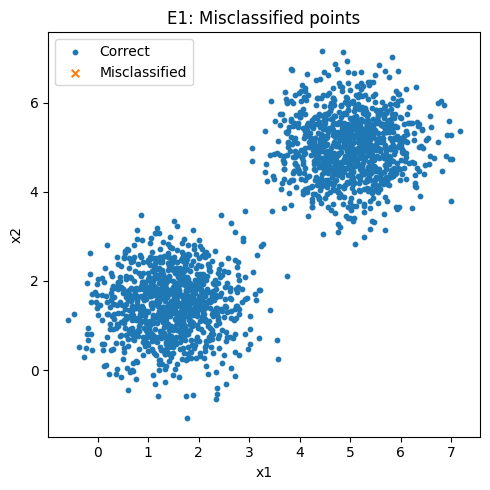

In [18]:
y_pm1 = to_pm1(y01)

perc_e1 = Perceptron(eta=0.01, max_epochs=100, shuffle=True, seed=7)
perc_e1.fit(X, y_pm1)

print("E1 final weights:", perc_e1.w)
print("E1 final bias   :", perc_e1.b)

y_pred_e1 = perc_e1.predict(X)
acc_e1 = accuracy(y_pm1, y_pred_e1)
print(f"E1 final accuracy: {acc_e1:.4f}")

plot_decision_boundary(perc_e1.w, perc_e1.b, X, y01, title="Exercise 1: Decision boundary", save_name="exercise1-decision-boundary")

plt.figure(figsize=(5,3))
plt.plot(perc_e1.history["epoch_acc"], marker="o")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("E1: Accuracy over epochs")
plt.tight_layout()
plt.savefig(Path(IMAGE_PATH) / "exercise1-accuracy-over-epochs.png")
plt.show()

highlight_misclassified(X, y01, y_pred_e1, title="E1: Misclassified points", save_name="exercise1-misclassified-points")


## Exercise 2

### Data Generation

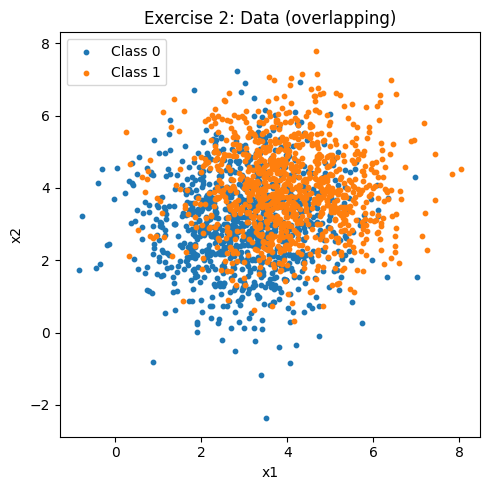

In [ ]:
n_per_class = 1000

mean0 = np.array([3.0, 3.0])
cov0  = np.array([[1.5, 0.0], [0.0, 1.5]])

mean1 = np.array([4.0, 4.0])
cov1  = np.array([[1.5, 0.0], [0.0, 1.5]])

X0 = rng.multivariate_normal(mean0, cov0, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov1, size=n_per_class)
X2 = np.vstack([X0, X1])
y01_2 = np.hstack([np.zeros(n_per_class, dtype=int), np.ones(n_per_class, dtype=int)])

plot_data(X2, y01_2, title="Exercise 2: Data (overlapping)", save_name="exercise2-data")


### Training Perceptron

E2 final weights: [0.09423536 0.05907569]
E2 final bias   : -0.41000000000000014
E2 final accuracy: 0.6375


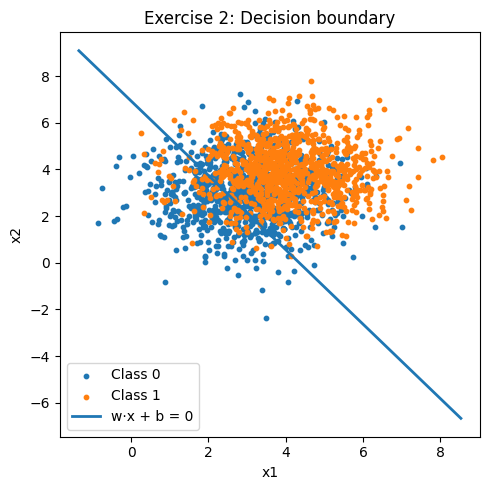

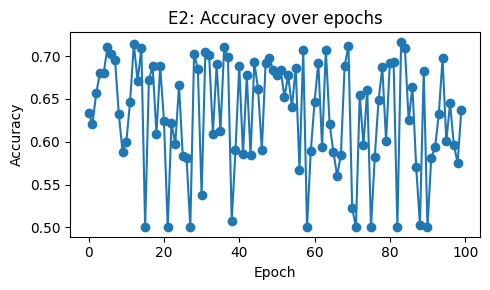

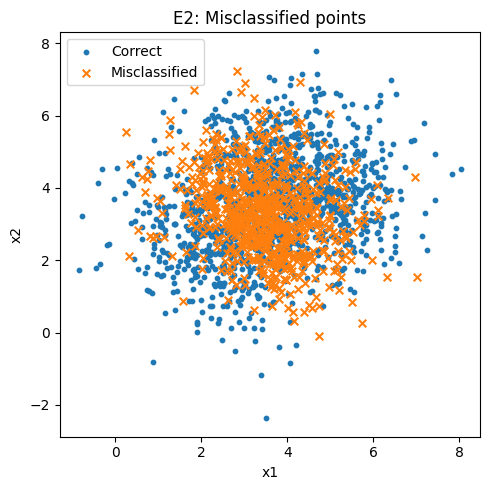

Optional multi-run: mean acc=0.5994, std=0.0649, best=0.7075 (seed=3)


In [20]:
def run_once(seed):
    y_pm1_2 = to_pm1(y01_2)
    p = Perceptron(eta=0.01, max_epochs=100, shuffle=True, seed=seed)
    p.fit(X2, y_pm1_2)
    acc = accuracy(y_pm1_2, p.predict(X2))
    return p, acc

perc_e2, acc_e2 = run_once(seed=11)
print("E2 final weights:", perc_e2.w)
print("E2 final bias   :", perc_e2.b)
print(f"E2 final accuracy: {acc_e2:.4f}")

plot_decision_boundary(perc_e2.w, perc_e2.b, X2, y01_2, title="Exercise 2: Decision boundary", save_name="exercise2-decision-boundary")

plt.figure(figsize=(5,3))
plt.plot(perc_e2.history["epoch_acc"], marker="o")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("E2: Accuracy over epochs")
plt.tight_layout()
plt.savefig(Path(IMAGE_PATH) / "exercise2-accuracy-over-epochs.png")
plt.show()

highlight_misclassified(X2, y01_2, perc_e2.predict(X2), title="E2: Misclassified points", save_name="exercise2-misclassified-points")

accs = []
best = (None, -1.0, None)
for s in [1, 3, 5, 7, 9]:
    p, a = run_once(seed=s)
    accs.append(a)
    if a > best[1]:
        best = (p, a, s)

print(f"Multi-run: mean acc={np.mean(accs):.4f}, std={np.std(accs):.4f}, best={best[1]:.4f} (seed={best[2]})")
